In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [29]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

In [35]:
series = pd.read_csv('data/sales-of-shampoo-over-three-years.csv', header=0,
                     parse_dates=[0], index_col=0, squeeze=True,
                    date_parser=parser, names=['Month', 'Sales'])

In [38]:
series.head()

Month
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
Name: Sales, dtype: float64

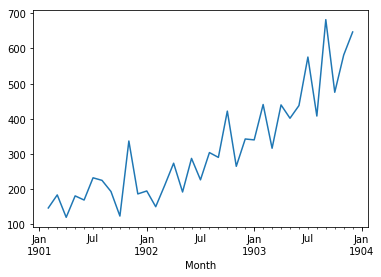

In [39]:
series.plot()

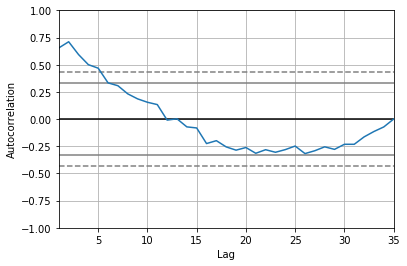

In [40]:
pd.plotting.autocorrelation_plot(series)

In [45]:
# fit model
model = ARIMA(series, order=(5,1,0)) # lag=5, diff_ord=1, mov_avg=0
model_fit = model.fit()

In [47]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   34
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -188.279
Method:                       css-mle   S.D. of innovations             59.834
Date:                Fri, 22 Jun 2018   AIC                            390.559
Time:                        04:40:04   BIC                            401.243
Sample:                    03-01-1901   HQIC                           394.203
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.5140      3.340      4.046      0.000       6.968      20.060
ar.L1.D.Sales    -1.1471      0.171     -6.709      0.000      -1.482      -0.812
ar.L2.D.Sales    -0.6961      0.265     

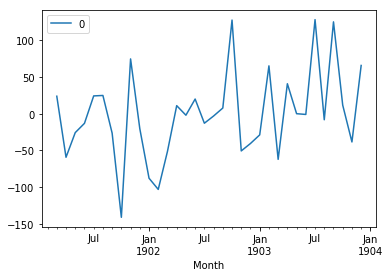

In [49]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

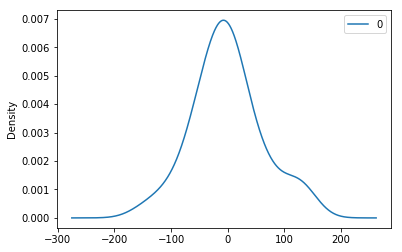

In [50]:
residuals.plot(kind='kde')

In [51]:
print(residuals.describe())

                0
count   34.000000
mean    -0.864518
std     61.112747
min   -141.014139
25%    -36.113719
50%     -2.684280
75%     24.004718
max    127.834610


In [54]:
# forecasting

X = series.values
X

array([ 145.9,  183.1,  119.3,  180.3,  168.5,  231.8,  224.5,  192.8,
        122.9,  336.5,  185.9,  194.3,  149.5,  210.1,  273.3,  191.4,
        287. ,  226. ,  303.6,  289.9,  421.6,  264.5,  342.3,  339.7,
        440.4,  315.9,  439.3,  401.3,  437.4,  575.5,  407.6,  682. ,
        475.3,  581.3,  646.9])

In [55]:
size = int(len(X)*0.66)

In [56]:
train, test = X[0:size], X[size:len(X)]

In [59]:
history = [x for x in train]

In [60]:
predictions = list()

In [64]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' %(yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' %error)

predicted=326.860788, expected=339.700000
predicted=391.723450, expected=440.400000
predicted=353.007362, expected=315.900000
predicted=385.696684, expected=439.300000
predicted=367.847660, expected=401.300000
predicted=448.605010, expected=437.400000
predicted=401.918028, expected=575.500000
predicted=429.887335, expected=407.600000
predicted=514.778006, expected=682.000000
predicted=442.026603, expected=475.300000
predicted=651.955375, expected=581.300000
predicted=561.306382, expected=646.900000
Test MSE: 6670.444


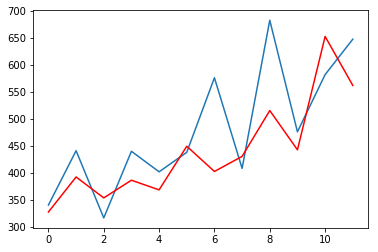

In [66]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()